# *Practica Evaluada de Machine Learning*

- *Dado un `.csv` de AirBnb, cree un modelo de regresion predictivo de ML para el precio.*
  
***siguiendo la metodologia y buenas practicas competentes***


In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv("C:\\Users\\oridi\\Desktop\\Programacion\\Machine Learning\\Machine-Learning-101-main\\Proyecto\\Proyecto\\airbnb-listings-extract.csv", sep = ';')

## *1era Parte: EDA*

- *Analisis Estadisitico: Medidas de dispersion y localizacion*
- *Correlacion*
- *Split: Test y Train*

In [3]:
#Exploring data
print("\n🔎 Dimensiones:", df.shape)
print("\n Tipos de datos:")
print(df.dtypes)
print("\n❓ Valores nulos:")
print(df.isnull().sum())



🔎 Dimensiones: (14780, 89)

 Tipos de datos:
ID                                  int64
Listing Url                        object
Scrape ID                           int64
Last Scraped                       object
Name                               object
                                   ...   
Cancellation Policy                object
Calculated host listings count    float64
Reviews per Month                 float64
Geolocation                        object
Features                           object
Length: 89, dtype: object

❓ Valores nulos:
ID                                   0
Listing Url                          0
Scrape ID                            0
Last Scraped                         0
Name                                 1
                                  ... 
Cancellation Policy                  0
Calculated host listings count       4
Reviews per Month                 3162
Geolocation                          0
Features                             1
Length: 89, dtype: 

In [4]:
# Verificar filas completas duplicadas
print(f"Filas duplicadas: {df.duplicated().sum()}")

Filas duplicadas: 0


In [5]:
 #Cantidad de valores nulos por columna
missing_per_column = df.isnull().sum().sort_values(ascending=False)

# Mostrar solo columnas con nulos
print("Valores nulos por columna:")
print(missing_per_column[missing_per_column > 0])

Valores nulos por columna:
Has Availability                  14768
Host Acceptance Rate              14741
Jurisdiction Names                14553
License                           14431
Square Feet                       14182
Monthly Price                     11219
Weekly Price                      11190
Notes                              9136
Security Deposit                   8524
Interaction                        6554
Access                             6462
Cleaning Fee                       6093
Transit                            5714
Neighborhood Overview              5646
Host About                         5241
Neighbourhood                      5229
House Rules                        5161
Space                              3892
Host Neighbourhood                 3876
Review Scores Value                3341
Review Scores Location             3340
Review Scores Checkin              3337
Review Scores Accuracy             3326
Review Scores Communication        3320
Review Scores

In [ ]:
# Porcentaje de nulos por columna para visualizacion para rapida de importancia
missing_pct = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

print("Porcentaje de nulos por columna:")
print(missing_pct[missing_pct > 0])

Porcentaje de nulos por columna:
Has Availability                  99.918809
Host Acceptance Rate              99.736130
Jurisdiction Names                98.464141
License                           97.638701
Square Feet                       95.953992
Monthly Price                     75.906631
Weekly Price                      75.710419
Notes                             61.813261
Security Deposit                  57.672530
Interaction                       44.343708
Access                            43.721245
Cleaning Fee                      41.224628
Transit                           38.660352
Neighborhood Overview             38.200271
Host About                        35.460081
Neighbourhood                     35.378890
House Rules                       34.918809
Space                             26.332882
Host Neighbourhood                26.224628
Review Scores Value               22.604871
Review Scores Location            22.598106
Review Scores Checkin             22.577808

*Observamos que tenemos columnas con un elevado porcentaje de nulos, vamos a eliminar directamente aquellas con + de 96% de nulos, ya que, no proporcionan informacion util y generarán ruido/sesgo elevado para nuestro modelo*

*Tambien vamos a observar las columnas mas en profundidad y asi, evaluar su relevancia para nuestros objetivos de prediccion*


In [8]:
# Umbral de eliminación
threshold = 0.96
# Porcentaje de nulos por columna
missing_ratio = df.isnull().mean()
# Columnas a eliminar
cols_to_drop = missing_ratio[missing_ratio > threshold].index

print(f" Eliminando {len(cols_to_drop)} columnas con más del 96% de nulos:")
print(cols_to_drop.tolist())
# Eliminar del dataframe
df.drop(columns=cols_to_drop, inplace=True)


 Eliminando 4 columnas con más del 96% de nulos:
['Host Acceptance Rate', 'Has Availability', 'License', 'Jurisdiction Names']


In [9]:
#columnas tipo objeto
object_cols = df.select_dtypes(include='object').columns
print(f"\nTotal columnas tipo object: {len(object_cols)}")
print("📦 Columnas tipo objeto:")
print(object_cols)
#columnas tipo numerico
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(f"\nTotal columnas tipo numerico: {len(num_cols)}")
print("📦 Columnas tipo numerico:")
print(num_cols)


Total columnas tipo object: 49
📦 Columnas tipo objeto:
Index(['Listing Url', 'Last Scraped', 'Name', 'Summary', 'Space',
       'Description', 'Experiences Offered', 'Neighborhood Overview', 'Notes',
       'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url',
       'Medium Url', 'Picture Url', 'XL Picture Url', 'Host URL', 'Host Name',
       'Host Since', 'Host Location', 'Host About', 'Host Response Time',
       'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood',
       'Host Verifications', 'Street', 'Neighbourhood',
       'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City',
       'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code',
       'Country', 'Property Type', 'Room Type', 'Bed Type', 'Amenities',
       'Calendar Updated', 'Calendar last Scraped', 'First Review',
       'Last Review', 'Cancellation Policy', 'Geolocation', 'Features'],
      dtype='object')

Total columnas tipo numerico: 36
📦 Columnas tipo numerico:
Inde

In [10]:
#contenido 
for col in object_cols:
    print(f"\n🔍 {col}:")
    print(df[col].head(1))


🔍 Listing Url:
0    https://www.airbnb.com/rooms/11210388
Name: Listing Url, dtype: object

🔍 Last Scraped:
0    2017-03-07
Name: Last Scraped, dtype: object

🔍 Name:
0    The Loft-Full Bath-Deck w/View
Name: Name, dtype: object

🔍 Summary:
0    Loft in the Hill country 12-15 minutes directl...
Name: Summary, dtype: object

🔍 Space:
0    This loft has a spectacular view of the hills ...
Name: Space, dtype: object

🔍 Description:
0    Loft in the Hill country 12-15 minutes directl...
Name: Description, dtype: object

🔍 Experiences Offered:
0    none
Name: Experiences Offered, dtype: object

🔍 Neighborhood Overview:
0    This neighborhood is located in the hills west...
Name: Neighborhood Overview, dtype: object

🔍 Notes:
0    The loft is located on a gated property.  Ther...
Name: Notes, dtype: object

🔍 Transit:
0    There is no public transportation from this lo...
Name: Transit, dtype: object

🔍 Access:
0    The loft is entirely private to the guest as i...
Name: Access, dtype: obje

*Vamos a eliminar columnas categoricas con contenido sin valor predictivo porque contienen texto libre, URLs, datos personales del host, etc.*

In [11]:
df['Country Code'].value_counts() #transformaremos mas adelante

Country Code
ES    14001
US      184
GB      159
FR      110
IT       68
AU       46
IE       45
DE       41
AT       31
NL       26
CA       20
BE       17
DK       16
CH        6
GR        5
HK        3
It        1
CU        1
Name: count, dtype: int64

In [15]:
cols_to_drop = [
    'Listing Url', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description',
    'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access',
    'Interaction', 'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url',
    'XL Picture Url', 'Host URL', 'Host Name', 'Host Location',
    'Host About', 'Host Response Time', 'Host Thumbnail Url', 'Host Picture Url',
    'Host Neighbourhood', 'Host Verifications', 'Street',
    'Country', 'Calendar Updated', 'Calendar last Scraped', 'First Review',
    'Last Review', 'Geolocation', 'Features','Neighbourhood',
    'Neighbourhood Cleansed','License'
]
#eliminamos 'Country' y nos quedamos con 'Country Code'
df = df.drop(columns=cols_to_drop, errors='ignore')
df.shape

(14780, 49)

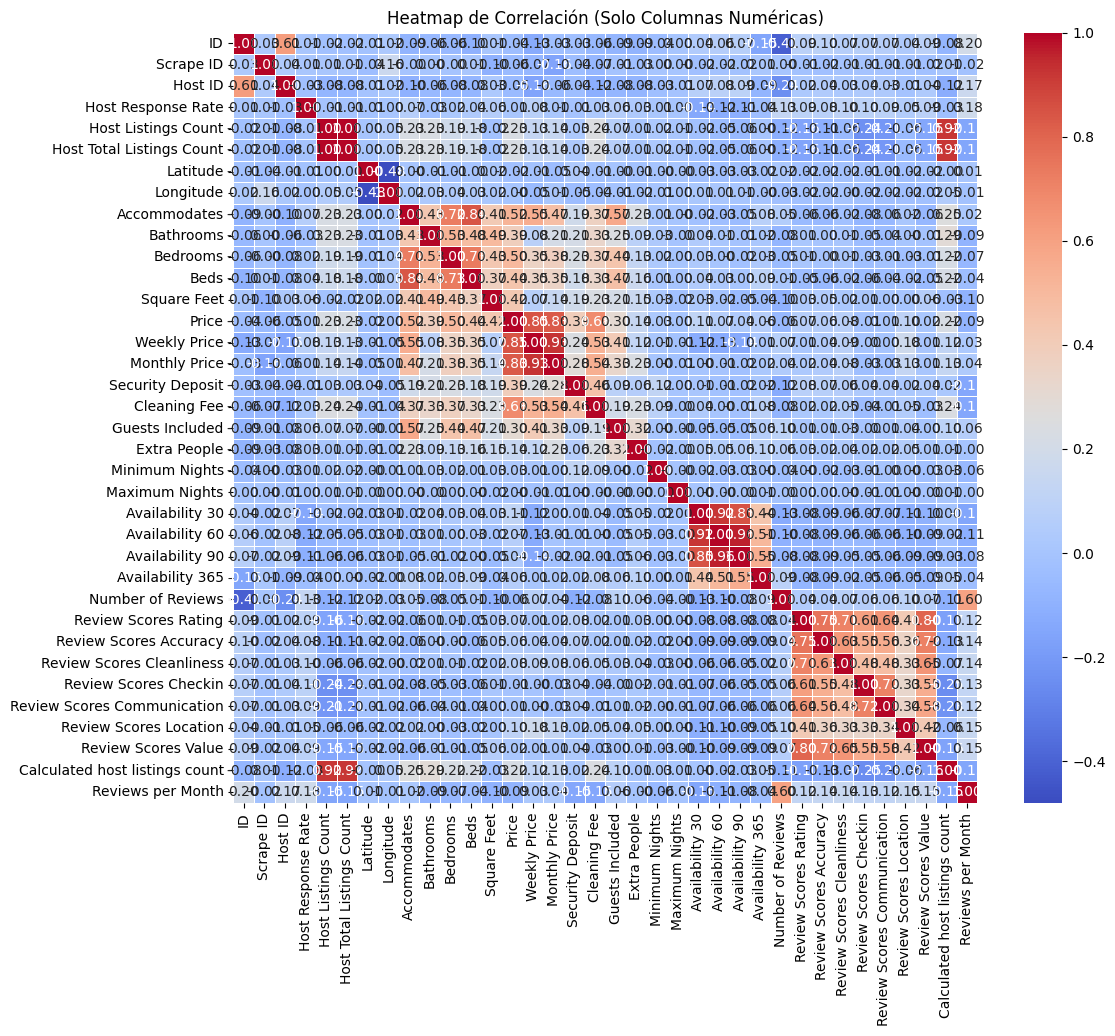

In [16]:
# Correlacion de columnas numéricas
numeric_df = df.select_dtypes(include=['int64', 'float64'])
# matriz de correlación
corr_matrix = numeric_df.corr()
# heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap de Correlación (Solo Columnas Numéricas)")
plt.show()


*Una vez realizado nuestro Analisis exploratorio del dataset y hemos comprendido un poco mas su composicion, pasaremos a dividirlo: 80% Train y 20% Test y, a partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él, seguiremos explorando las variables, buscando correlacion entre ellas, evaluando su valor y transformandolas.*

In [20]:
#Split
train, test = train_test_split(df, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('C:\\Users\\oridi\Desktop\\Programacion\\Machine Learning\\Machine-Learning-101-main\\Proyecto\\ML-Practica-Train.csv', sep=';', decimal='.', index=False)
test.to_csv('C:\\Users\\oridi\\Desktop\\Programacion\\Machine Learning\\Machine-Learning-101-main\\Proyecto\\ML-Practica-Test.csv', sep=';', decimal='.', index=False)


<>:8: SyntaxWarning: invalid escape sequence '\D'
<>:8: SyntaxWarning: invalid escape sequence '\D'
C:\Users\oridi\AppData\Local\Temp\ipykernel_2520\3283844902.py:8: SyntaxWarning: invalid escape sequence '\D'
  train.to_csv('C:\\Users\\oridi\Desktop\\Programacion\\Machine Learning\\Machine-Learning-101-main\\Proyecto\\ML-Practica-Train.csv', sep=';', decimal='.', index=False)


Dimensiones del dataset de training: (11824, 49)
Dimensiones del dataset de test: (2956, 49)


## *2da Parte: Preprocesado*

- *preprocesado de Train*
- *Gestion de variables categoricas*
- *Limpieza de valores nulos y Outliers*


In [21]:
# Cargamos datos de Train
train_df = pd.read_csv("C:\\Users\\oridi\\Desktop\\Programacion\\Machine Learning\\Machine-Learning-101-main\\Proyecto\\ML-Practica-Train.csv", sep=';', decimal='.')
train_df.head(5).T

,0,1,2,3,4
ID,5994463,14136180,15520134,8809721,1162707
Scrape ID,20170407214119,20170407214119,20170407214119,20170407214119,20170407214119
Host ID,31124866,85301317,84213235,15258781,1706029
Host Since,2015-04-13,2016-07-22,2016-07-17,2014-05-08,2012-02-06
Host Response Rate,100.0,100.0,100.0,100.0,100.0
Host Listings Count,2.0,1.0,16.0,114.0,2.0
Host Total Listings Count,2.0,1.0,16.0,114.0,2.0
Neighbourhood Group Cleansed,Retiro,Centro,Carabanchel,Centro,Chamberí
City,Madrid,Madrid,Madrid,Madrid,Madrid
State,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,28


In [23]:
print(train_df.shape)

(11824, 49)


In [24]:
#transformamos square en metro / Recordemos hay 95% nan
def sqft_to_m2(superficie):
    return superficie * 0.3048 * 0.3048

train_df['Square Feet'] = sqft_to_m2(train_df['Square Feet'])

*Siguiendo el mapa de calor visualizado antes, eliminaremos ciertas variables que estan muy relacionadas entre si o no aportan valor, seguidamente, exploraremos nuestro datos mediante diagramas, buscaremos y analizaremos medidas de dispersion y variables categoricas para su transformacion*

In [25]:
#Eliminamos colunmas que no nos aportan valor
train_df = train_df.drop(['Scrape ID','ID','Host ID','Host Since','Host Listings Count',
                          'Host Total Listings Count','Reviews per Month','Zipcode',
                          'Review Scores Rating','Review Scores Cleanliness','Review Scores Communication',
                          'Number of Reviews','Review Scores Location','Review Scores Checkin',
                          'Review Scores Accuracy','Calculated host listings count','State','Market',
                          'Smart Location','Monthly Price','Weekly Price','Neighbourhood Group Cleansed'                        
                          ], axis =1)

#Elimino Monthly y Weekly price dado que son un 75% de valores nulos y la columna Price está completa -> alta correlacion

In [26]:
print("\n🔎 Dimensiones:", train_df.shape)
print(train_df.describe()) #buscaremos valores elevados


🔎 Dimensiones: (11824, 27)
       Host Response Rate      Latitude     Longitude  Accommodates  \
count        10317.000000  11824.000000  11824.000000  11824.000000   
mean            94.803722     40.491628     -3.776863      3.277486   
std             15.247078      4.701030     14.014695      2.093973   
min              0.000000    -37.851182   -123.124429      1.000000   
25%            100.000000     40.409758     -3.707538      2.000000   
50%            100.000000     40.419331     -3.700763      3.000000   
75%            100.000000     40.430778     -3.683917      4.000000   
max            100.000000     55.966912    153.371427     16.000000   

          Bathrooms     Bedrooms          Beds  Square Feet         Price  \
count  11780.000000  11804.00000  11787.000000   474.000000  11809.000000   
mean       1.285229      1.34429      2.049122    36.835075     73.712592   
std        0.664691      0.90518      1.623489    62.349629     71.624844   
min        0.000000     

In [30]:
# Variables categóricas con pocos valores
cat_cols = [col for col in train_df.select_dtypes(include='object').columns if train_df[col].nunique() < 20]
print(cat_cols)

['Country Code', 'Room Type', 'Bed Type', 'Cancellation Policy']


In [36]:
train_object_cols = train_df.select_dtypes(include='object').columns
print(f"\nTotal columnas tipo object: {len(train_object_cols)}")
print("📦 Columnas tipo objeto:")
print(train_object_cols)


Total columnas tipo object: 7
📦 Columnas tipo objeto:
Index(['City', 'Country Code', 'Property Type', 'Room Type', 'Bed Type',
       'Amenities', 'Cancellation Policy'],
      dtype='object')


In [33]:
train_df['City'].value_counts()

City
Madrid              10567
Barcelona             235
London                104
Paris                  85
Palma                  44
                    ...  
Hong Kong               1
San Fernando            1
Tsim Sha Tsui           1
Beverly Hills           1
Aravaca (Madrid)        1
Name: count, Length: 222, dtype: int64

*Vamos a filtrar nuestro Dataset solo a 'Madrid'*

In [34]:
train_df= train_df[train_df['City'].str.lower() == 'madrid']
print("⚠️ Filtrando Dataset solo a Madrid")
print(train_df.shape)


⚠️ Filtrando Dataset solo a Madrid
(10575, 27)


In [35]:
train_df['Property Type'].value_counts()

Property Type
Apartment             8748
House                  766
Condominium            268
Bed & Breakfast        263
Loft                   230
Other                  166
Dorm                    36
Guesthouse              29
Chalet                  21
Hostel                  13
Serviced apartment       9
Townhouse                7
Boutique hotel           5
Villa                    4
Casa particular          3
Guest suite              2
Earth House              2
Tent                     1
Camper/RV                1
Bungalow                 1
Name: count, dtype: int64

In [10]:
#Transformacion de variables
from sklearn.preprocessing import OrdinalEncoder

ordinal_cols = ['Country Code', 'Room Type', 'Bed Type', 'Cancellation Policy','City','Property Type']
ordinal_encoder = OrdinalEncoder()

# Aplicar el encoding solo sobre las columnas seleccionadas
train_df[ordinal_cols] = ordinal_encoder.fit_transform(train_df[ordinal_cols])
# Mostrar los valores únicos codificados por columna
for i, col in enumerate(ordinal_cols):
    categories = ordinal_encoder.categories_[i]
    print(f"📌 {col}:")
    for idx, cat in enumerate(categories):
        print(f"   {cat} ➝ {idx}")

📌 Country Code:
   ES ➝ 0
📌 Room Type:
   Entire home/apt ➝ 0
   Private room ➝ 1
   Shared room ➝ 2
📌 Bed Type:
   Airbed ➝ 0
   Couch ➝ 1
   Futon ➝ 2
   Pull-out Sofa ➝ 3
   Real Bed ➝ 4
📌 Cancellation Policy:
   flexible ➝ 0
   moderate ➝ 1
   strict ➝ 2
   super_strict_30 ➝ 3
   super_strict_60 ➝ 4
📌 City:
   MADRID ➝ 0
   Madrid ➝ 1
   madrid ➝ 2
📌 Property Type:
   Apartment ➝ 0
   Bed & Breakfast ➝ 1
   Boutique hotel ➝ 2
   Bungalow ➝ 3
   Camper/RV ➝ 4
   Casa particular ➝ 5
   Chalet ➝ 6
   Condominium ➝ 7
   Dorm ➝ 8
   Earth House ➝ 9
   Guest suite ➝ 10
   Guesthouse ➝ 11
   Hostel ➝ 12
   House ➝ 13
   Loft ➝ 14
   Other ➝ 15
   Serviced apartment ➝ 16
   Tent ➝ 17
   Townhouse ➝ 18
   Villa ➝ 19


In [11]:
#Revisemos que columnas categoricas tenemos
train_object_cols = train_df.select_dtypes(include='object').columns
print(f"\nTotal columnas tipo object: {len(train_object_cols)}")
print("📦 Columnas tipo objeto:")
print(train_object_cols)


Total columnas tipo object: 1
📦 Columnas tipo objeto:
Index(['Amenities'], dtype='object')


In [12]:
# Porcentaje de nulos por columna 
missing = (train_df.isnull().sum() / len(train_df) * 100).sort_values(ascending=False)

print("Porcentaje de nulos por columna:")
print(missing[missing > 0])

Porcentaje de nulos por columna:
Square Feet            96.094563
Security Deposit       56.973995
Cleaning Fee           40.567376
Review Scores Value    21.862884
Host Response Rate     12.425532
Amenities               0.851064
Bathrooms               0.378251
Beds                    0.349882
Bedrooms                0.170213
Price                   0.075650
dtype: float64


In [13]:
#Gestion de valores nulos
from sklearn.impute import SimpleImputer

# Separar columnas numéricas y categóricas
numeric_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
train_object_cols 

# Imputador para numéricos con mediana
num_imputer = SimpleImputer(strategy='median')
train_df[numeric_cols] = num_imputer.fit_transform(train_df[numeric_cols])

# Imputador para categóricos con moda
cat_imputer = SimpleImputer(strategy='most_frequent')
train_df[train_object_cols] = cat_imputer.fit_transform(train_df[train_object_cols])

# Verificamos
missing = (train_df.isnull().sum() / len(train_df) * 100).sort_values(ascending=False)
print("Porcentaje de nulos por columna:")
print(missing[missing > 0])

Porcentaje de nulos por columna:
Series([], dtype: float64)


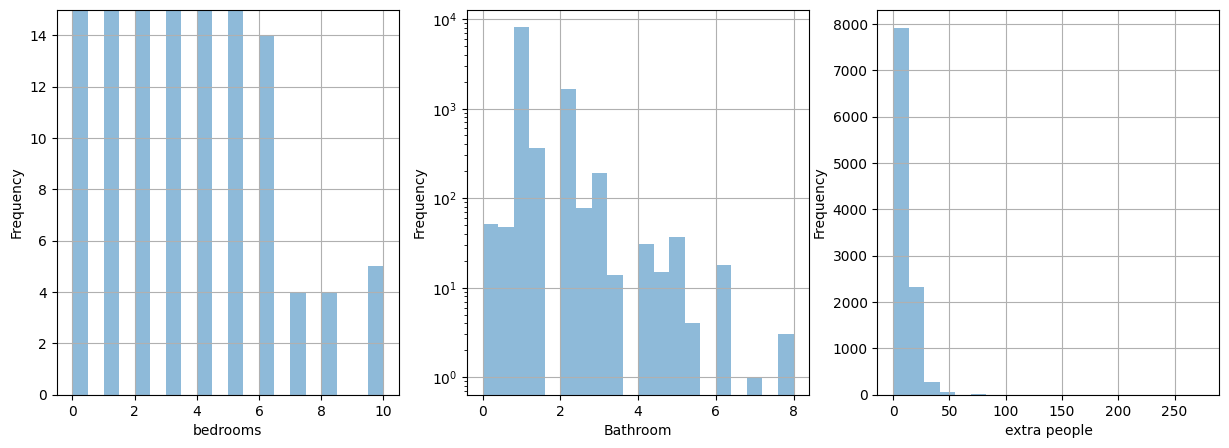

In [14]:
#Pintemos diagramas para: extra people,beds, bathroom,bedrooms,acomodates, maximun y minimun nights
plt.figure(figsize=(15, 5))
#plt.axis([0, 10, 0, 10000])

plt.subplot(1,3,1)
train_df['Bedrooms'].plot.hist(alpha=0.5, bins=20, grid = True)
plt.ylim(0, 15)
plt.xlabel('bedrooms')

plt.subplot(1,3,2)
train_df['Bathrooms'].plot.hist(alpha=0.5, bins=20, grid = True)
plt.yscale("log")
plt.xlabel('Bathroom')

plt.subplot(1,3,3)
train_df['Extra People'].plot.hist(alpha=0.5, bins=20, grid = True)
plt.xlabel('extra people')

plt.show()

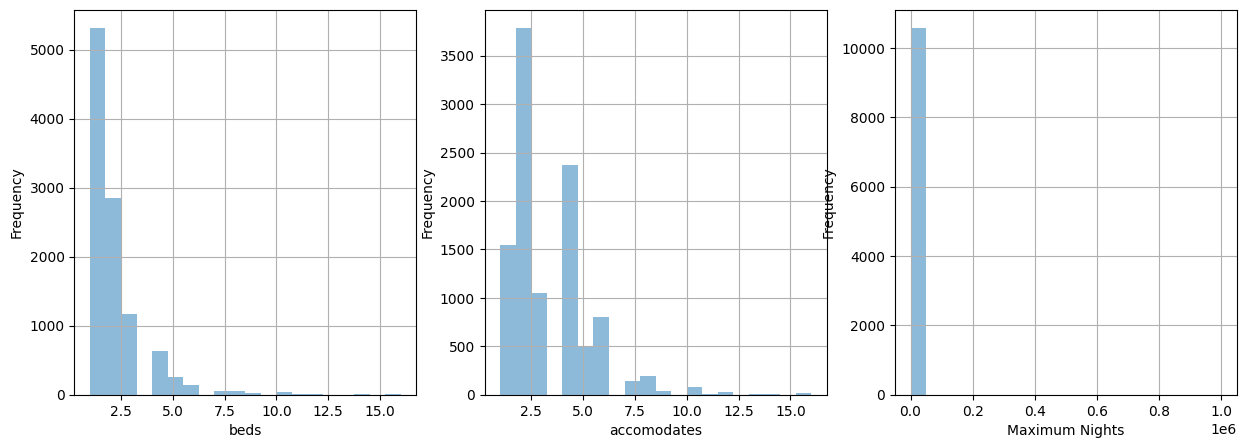

In [31]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
train_df['Beds'].plot.hist(alpha=0.5, bins=20, grid = True)
plt.xlabel('beds')

plt.subplot(1,3,2)
train_df['Accommodates'].plot.hist(alpha=0.5, bins=20, grid = True)
plt.xlabel('accomodates')

plt.subplot(1,3,3)
train_df['Maximum Nights'].plot.hist(alpha=0.5, bins=20, grid = True)
plt.xlabel('Maximum Nights')

plt.show()

In [32]:
train_df["Beds"].value_counts().sort_index()

Beds
1.0     5312
2.0     2852
3.0     1176
4.0      636
5.0      255
6.0      142
7.0       60
8.0       53
9.0       25
10.0      34
11.0       4
12.0       7
13.0       3
14.0       4
15.0       1
16.0      11
Name: count, dtype: int64

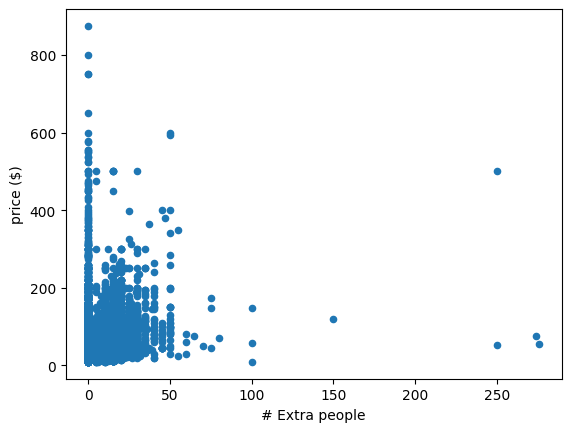

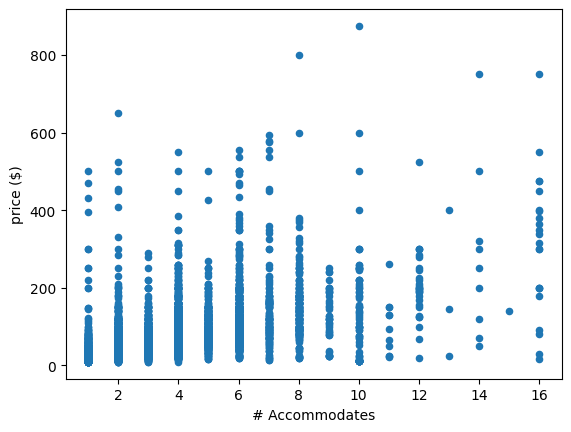

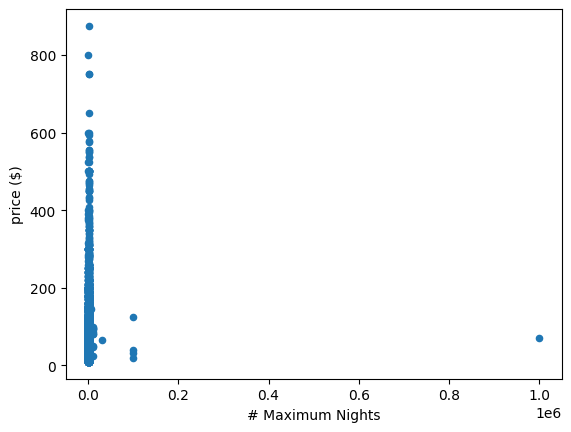

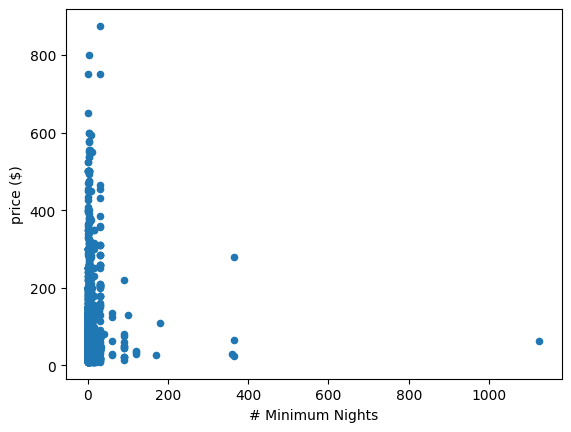

In [33]:
# Cortar extra people / accomodates / maximun y minimun nights
train_df.plot(kind = 'scatter',x='Extra People',y = 'Price')
plt.xlabel('# Extra people')
plt.ylabel('price ($)')
plt.show()

train_df.plot(kind = 'scatter',x='Accommodates',y = 'Price')
plt.xlabel('# Accommodates')
plt.ylabel('price ($)')
plt.show()

train_df.plot(kind = 'scatter',x='Maximum Nights',y = 'Price')
plt.xlabel('# Maximum Nights')
plt.ylabel('price ($)')
plt.show()

train_df.plot(kind = 'scatter',x='Minimum Nights',y = 'Price')
plt.xlabel('# Minimum Nights')
plt.ylabel('price ($)')
plt.show()

In [15]:
train_df = train_df.drop(['Maximum Nights','Minimum Nights','Amenities'], axis=1)
print(train_df.shape)

(10575, 24)


In [16]:
#Filtramos
print("⚠️ Reduciendo tamaño de columnas: 'Beds' y 'Extra People'")
train_df = train_df[(train_df['Beds'] <= 10) & (train_df['Extra People'] <= 50)]
print(train_df.shape)

⚠️ Reduciendo tamaño de columnas: 'Beds' y 'Extra People'
(10526, 24)


In [17]:
#Gestion de Outliers
from scipy.stats import zscore
# Calcular columnas numericas nuevamente porque hemos eliminado columnas
cols_num = train_df.select_dtypes(include=['int64', 'float64']).columns
# Calcular Z-score
z_scores = np.abs(zscore(train_df[cols_num]))
outlier_mask = (z_scores > 3).any(axis=1)  # umbral = 3
print(outlier_mask.value_counts())

# Eliminar outliers
print(f"⚠️ Eliminando {outlier_mask.sum()} filas con outliers (Z-Score)")
train_df = train_df[~outlier_mask]

False    8269
True     2257
Name: count, dtype: int64
⚠️ Eliminando 2257 filas con outliers (Z-Score)


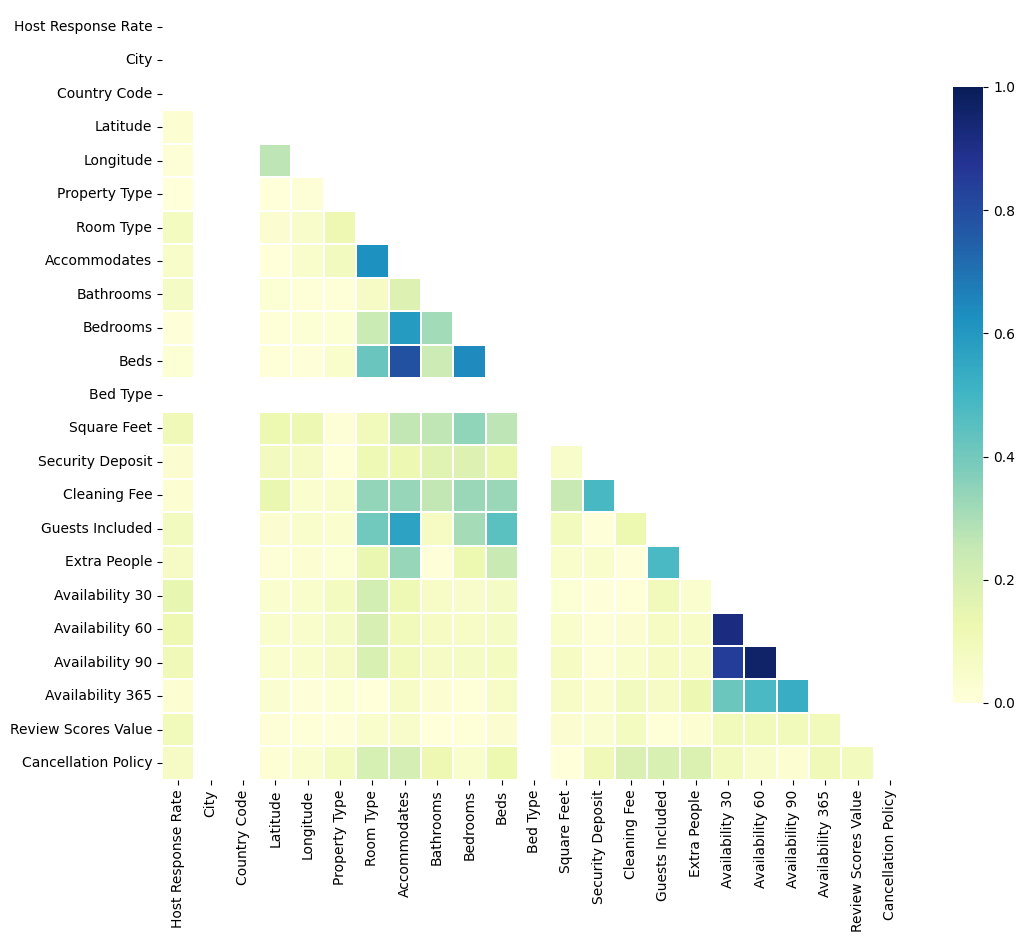

In [17]:
#Correlacion con el precio

corr = np.abs(train_df[cols_num].drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()


In [18]:
train_df= train_df.drop(['Availability 30','Availability 60', 'Availability 90', 'Bed Type'], axis=1)
print(train_df.shape)
print(sorted(train_df.columns))

(8269, 20)
['Accommodates', 'Availability 365', 'Bathrooms', 'Bedrooms', 'Beds', 'Cancellation Policy', 'City', 'Cleaning Fee', 'Country Code', 'Extra People', 'Guests Included', 'Host Response Rate', 'Latitude', 'Longitude', 'Price', 'Property Type', 'Review Scores Value', 'Room Type', 'Security Deposit', 'Square Feet']


## *3era Parte: Algoritmos de ML*

- *Escalado, estandarizado y/o transformacion*
- *seleccion de modelo para regresion: `Rigde` y `Lasso` (escalado necesario)*
- *Entrenamiento y Evaluacion de rendimiento con `R2` y `MSE`*
- *Ajuste de hiperparametros* `GrideSearchCV`
- *Modelos alternativos:* `DecisionTreeRegressor`, `RandomForestRegressor`, `SVR (con Kernel RBF)`
- *Validacion cruzada*

*Iniciaremos Cargando nuestro Dataset de Test y aplicaremos todas las transformaciones hechas en el Train*

In [19]:
test_df = pd.read_csv("C:\\Users\\oridi\\Desktop\\Programacion\\Machine Learning\\Machine-Learning-101-main\\Proyecto\\ML-Practica-Test.csv", sep=';', decimal='.')
print('🔍 Explorando dimensiones actuales:')
print(test_df.shape)

#transformamos square en metro / Recordemos hay 95% nan
def sqft_to_m2(superficie):
    return superficie * 0.3048 * 0.3048

test_df['Square Feet'] = sqft_to_m2(test_df['Square Feet'])

##Eliminamos colunmas que no nos aportan valor
test_df = test_df.drop(['Scrape ID','ID','Host ID','Host Since','Host Listings Count',
                          'Host Total Listings Count','Reviews per Month',
                          'Review Scores Rating','Review Scores Cleanliness','Review Scores Communication',
                          'Number of Reviews','Review Scores Location','Review Scores Checkin',
                          'Review Scores Accuracy','Calculated host listings count','State','Market',
                          'Smart Location','Monthly Price','Weekly Price','Neighbourhood Group Cleansed',
                          'Availability 30','Availability 60', 'Availability 90', 'Bed Type',
                          'Maximum Nights','Minimum Nights','Amenities','Zipcode'                                                  
                          ], axis =1)

#Gestion de valores nulos
from sklearn.impute import SimpleImputer

# Separar columnas numéricas y categóricas
cols_num = test_df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = test_df.select_dtypes(include='object').columns 
# Imputador para numéricos con mediana
num_imputer = SimpleImputer(strategy='median')
test_df[cols_num] = num_imputer.fit_transform(test_df[cols_num])
# Imputador para categóricos con moda
cat_imputer = SimpleImputer(strategy='most_frequent')
test_df[cat_cols] = cat_imputer.fit_transform(test_df[cat_cols])
# Verificamos
missing = (test_df.isnull().sum() / len(test_df) * 100).sort_values(ascending=False)
print("Porcentaje de nulos por columna:")
print(missing[missing > 0])

#Filtramos solo a Madrid
test_df= test_df[test_df['City'].str.lower() == 'madrid']
print("⚠️ Filtrando Dataset solo a Madrid")
print(test_df.shape)


#Transformacion de variables
from sklearn.preprocessing import OrdinalEncoder

ordinal_cols = ['Country Code', 'Room Type', 'Cancellation Policy','City', 'Property Type']
ordinal_encoder = OrdinalEncoder()
# Aplicar el encoding solo sobre las columnas seleccionadas
test_df[ordinal_cols] = ordinal_encoder.fit_transform(test_df[ordinal_cols])


#Gestion de Outliers
from scipy.stats import zscore
# Calcular Z-score
z_scores = np.abs(zscore(test_df[cols_num]))
outlier_mask = (z_scores > 3).any(axis=1)  # umbral = 3
print(outlier_mask.value_counts())

# Eliminar outliers
print(f"⚠️ Eliminando {outlier_mask.sum()} filas con outliers (Z-Score)")
test_df = test_df[~outlier_mask]


#Filtramos
print("⚠️ Reduciendo tamaño de columnas: 'Beds' y 'Extra People'")
test_df = test_df[(test_df['Beds'] <= 10) & (test_df['Extra People'] <= 50)]
print("✅ Dimensiones Finales de Test:", test_df.shape)
print("✅ Dimensiones Finales de Train:", train_df.shape)

🔍 Explorando dimensiones actuales:
(2956, 49)
Porcentaje de nulos por columna:
Series([], dtype: float64)
⚠️ Filtrando Dataset solo a Madrid
(2644, 20)
False    2152
True      492
Name: count, dtype: int64
⚠️ Eliminando 492 filas con outliers (Z-Score)
⚠️ Reduciendo tamaño de columnas: 'Beds' y 'Extra People'
✅ Dimensiones Finales de Test: (2152, 20)
✅ Dimensiones Finales de Train: (8269, 20)


In [ ]:
"""
De haber diferencias en el numero de columnas: comprobamos y modificamos

train_cols = set(train_df.columns)
test_cols = set(test_df.columns)

solo_en_train = train_cols - test_cols
solo_en_test = test_cols - train_cols

print("Columnas **solo en train**:", solo_en_train)
print("Columnas **solo en test**:", solo_en_test)
"""

### ***Recapitulacion***:
*En este punto, hemos explorado, eliminado, filtrado, transformado (todas nuestras variables son numericas),imputado valores de mediana y moda y reducido nuestro datos, tanto en Train como en Test*

*Acontinuacion, separaremos nuestras variables independientes (X) de la variable objetivo (y), que en nuestro caso es el precio, vamos a utilizar modelos para problemas de regresion*

*Crearemos un diccionario de modelos para aplicar varios en un solo bucle y, escalaremos nuestros datos ya que modelos como Lasso (L1) y Ridge (L2) penalizan los coeficientes de las variables, es decir, si nuestras variables tienen escalas distintas (ej. metros cuadrados vs. número de baños), las que tienen valores grandes dominarán la penalización. Eso arruina el entrenamiento. solo escalamos los datos de TRAIN*

*Seguidamente, evaluaremos con:*
- *Error cuadratico medio: evalua la diferencia promedio entre los valores predichos por el modelo y los valores reales*
- *Coeficiente de determinacion: indica el porcentaje de la variabilidad de la variable dependiente*
 
 *Según los datos obtenidos, buscaremos mejoralos con ajuste de hiperparametros*

In [22]:
#Columna objetivo 'price'
target_col = 'Price'

#Separar variables independientes y dependientes
X_train = train_df.drop(columns=[target_col])
y_train = train_df[target_col]

X_test = test_df.drop(columns=[target_col])
y_test = test_df[target_col]

print("✅ X_train:", X_train.shape)
print("✅ y_train:", y_train.shape)
print("✅ X_test:", X_test.shape)
print("✅ y_test:", y_test.shape)

✅ X_train: (8269, 19)
✅ y_train: (8269,)
✅ X_test: (2152, 19)
✅ y_test: (2152,)


In [23]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing

In [22]:
# Diccionario de modelos
modelos = {
    "Ridge": Ridge(alpha=1.0, random_state=42),
    "Lasso": Lasso(alpha=0.1, random_state=42),
    "DecisionTree": DecisionTreeRegressor(max_depth=5, random_state=42)
}

In [ ]:
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)

XtrainScaled = scaler.transform(X_train)
XtestScaled = scaler.transform(X_test) 

print('✅Datos entrenamiento: ', XtrainScaled.shape)
print('✅Datos test: ', XtestScaled.shape)

✅Datos entrenamiento:  (8269, 19)
✅Datos test:  (2152, 19)


In [ ]:
#Utilizemos los modelos sin escalado
for nombre, modelo in modelos.items():
    print(f"\nEntrenando modelo: {nombre}")
    
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"📉 MSE: {mse:.2f}")
    print(f"📈 R²: {r2:.2f}")


Entrenando modelo: Ridge
📉 MSE: 495.10
📈 R²: 0.59

Entrenando modelo: Lasso
📉 MSE: 497.52
📈 R²: 0.59

Entrenando modelo: DecisionTree
📉 MSE: 521.53
📈 R²: 0.57


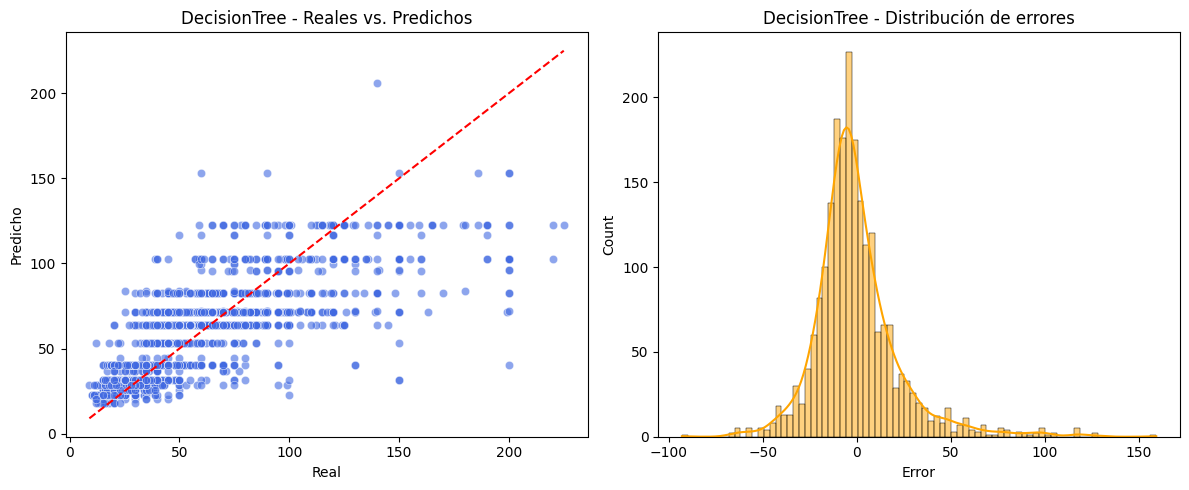

None


In [63]:
def graficar_resultados(y_test, y_pred, nombre_modelo):
    plt.figure(figsize=(12, 5))

    # Reales vs Predichos
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='royalblue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Real')
    plt.ylabel('Predicho')
    plt.title(f'{nombre_modelo} - Reales vs. Predichos')

    # Errores (residuos)
    plt.subplot(1, 2, 2)
    errores = y_test - y_pred
    sns.histplot(errores, kde=True, color='orange')
    plt.title(f'{nombre_modelo} - Distribución de errores')
    plt.xlabel('Error')

    plt.tight_layout()
    plt.show()
    
print(graficar_resultados(y_test, y_pred, nombre))

In [ ]:
#Ahora veremos los modelos con el escalado
for nombre, modelo in modelos.items():
    print(f"\nEntrenando modelo: {nombre}")
    
    modelo.fit(XtrainScaled, y_train)
    y_pred = modelo.predict(XtestScaled)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"📉 MSE: {mse:.2f}")
    print(f"📈 R²: {r2:.2f}")


Entrenando modelo: Ridge
📉 MSE: 495.80
📈 R²: 0.59

Entrenando modelo: Lasso
📉 MSE: 495.55
📈 R²: 0.59

Entrenando modelo: DecisionTree
📉 MSE: 521.53
📈 R²: 0.57


In [29]:
#  hiperparámetros 
param_grid = {'alpha': [0.1, 0.5, 1, 10, 100]}
lasso = Lasso()
# objeto GridSearchCV
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')

# Entrenar el modelo con la búsqueda de hiperparámetros
grid_search.fit(XtrainScaled , y_train)

# Obtener el mejor modelo
best_lasso = grid_search.best_estimator_

# Predecir con el mejor modelo
y_pred = best_lasso.predict(XtestScaled )

# Calcular el MSE y R²
mse = mean_squared_error(y_test, y_pred)
r2 = best_lasso.score(XtestScaled , y_test)

print(f"Mejor valor de alpha: {grid_search.best_params_['alpha']}")
print(f"📉 MSE: {mse}")
print(f"📈 R²: {r2}")

Mejor valor de alpha: 0.1
📉 MSE: 495.54963633513444
📈 R²: 0.5904423455710326


*Podemos observar que el error cuadratico medio es muy alto, incluso ajustando hiperparametros, probemos con otro algoritmo, un Kernel*

📉 MSE para SVR: 559.4820191161738
📈 R² para SVR: 0.5376040528673943


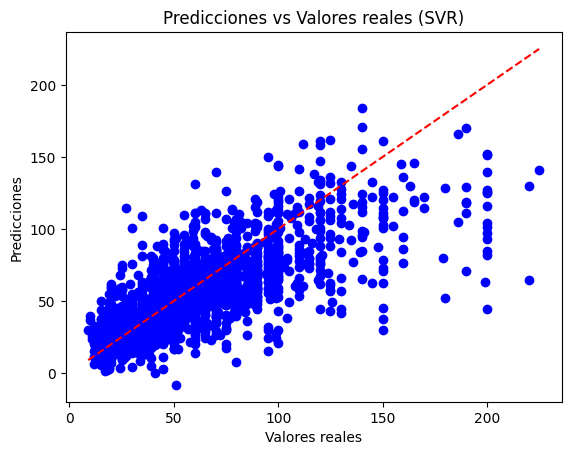

In [30]:
from sklearn.svm import SVR

#Escalar los datos objetivo? no estoy segura de esto!!
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Crear el modelo SVR con un kernel RBF
svr = SVR(kernel='rbf', C=100, epsilon=0.1)

# Entrenar el modelo
svr.fit(XtrainScaled, y_train_scaled.ravel()) 

# Predecir
y_pred_scaled = svr.predict(XtestScaled )

# Desescalar las predicciones para volver a la escala original
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

# Calcular el MSE y R²
mse_svr = mean_squared_error(y_test, y_pred)
r2_svr = r2_score(y_test, y_pred)

print(f"📉 MSE para SVR: {mse_svr}")
print(f"📈 R² para SVR: {r2_svr}")

# Graficar los resultados
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores reales (SVR)')
plt.show()

In [31]:
#CV
from sklearn.pipeline import make_pipeline

# Creamos el pipeline con el escalador y el modelo
model = make_pipeline(StandardScaler(), Ridge())

# Cross-Validation con 5 folds
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

print(f"Scores de MSE por pliegue: {cv_scores}")
print(f"📉 MSE promedio: {-cv_scores.mean()}")

Scores de MSE por pliegue: [-541.3009351  -501.1542311  -440.28728465 -490.26211067 -425.9310462 ]
📉 MSE promedio: 479.7871215453903


### ***Conclusiones:***
*Observando que el MSE sigue siendo alto tras haber utilizado diversos modelos y el rendimiento es similar, entonces seria momento de profundizar más. Tecnicas a considerar para mejor nuestro modelo:* 
- *Algoritmos Robustos*
- *Utilizar una cantidad mas reducida de variables (quizas hemos utilizado alguna irrelevante sin aporte real, generando sesgo)*
- *Cear variables especificas para nuestro problema como por ejemplo: "Precio por Extra People"*
- *Utilizar tecnicas de seleccion de caracteristicas*
- *Cross-Validation estratificada*
- *Transformaciones no lineales como `PolynomialFeatures`*

*Para finalizar nuestra exploracion, utilizaremos un algoritmo mas potente, esta clase de algoritmos capturan **no linealidades**, manejan automáticamente variables categóricas si están codificadas numéricamente, suelen mejorar bastante los resultados en regresión siendo muy eficientes para datasets grandes e incluso soportan nulos, ¡vamos, que son geniales!.*

In [32]:
from sklearn.ensemble import HistGradientBoostingRegressor

# 1. Modelo base
hgb_model = HistGradientBoostingRegressor(random_state=42)

# 2. Grid de hiperparámetros
hgb_params = {
    'learning_rate': [0.01, 0.1],
    'max_iter': [100, 200],
    'max_leaf_nodes': [31, 50],
    'max_depth': [None, 10]
}

# 3. GridSearchCV
hgb_grid = GridSearchCV(hgb_model, hgb_params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1)
hgb_grid.fit(X_train, y_train)

# 4. Resultados
hgb_best = hgb_grid.best_estimator_
y_pred_hgb = hgb_best.predict(X_test)

print("HistGradientBoosting - Mejor configuración:", hgb_grid.best_params_)
print(f"📉 MSE: {mean_squared_error(y_test, y_pred_hgb):.2f}")
print(f"📈 R²: {r2_score(y_test, y_pred_hgb):.4f}")


Fitting 5 folds for each of 16 candidates, totalling 80 fits
HistGradientBoosting - Mejor configuración: {'learning_rate': 0.1, 'max_depth': None, 'max_iter': 100, 'max_leaf_nodes': 31}
📉 MSE: 350.30
📈 R²: 0.7105


In [53]:
from sklearn.ensemble import GradientBoostingClassifier
Niterations = [25,50,75,100]
learningRate = [0.5,0.1,0.05]
# mantenemos max_depth estático: max_depth=2

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingClassifier(random_state=0, max_depth=2), param_grid=param_grid, cv = 3, verbose=2)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

Fitting 3 folds for each of 12 candidates, totalling 36 fits


c:\Users\oridi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


[CV] END .................learning_rate=0.5, n_estimators=25; total time=  37.2s
[CV] END .................learning_rate=0.5, n_estimators=25; total time=  37.8s
[CV] END .................learning_rate=0.5, n_estimators=25; total time=  38.5s
[CV] END .................learning_rate=0.5, n_estimators=50; total time= 1.2min
[CV] END .................learning_rate=0.5, n_estimators=50; total time= 1.2min
[CV] END .................learning_rate=0.5, n_estimators=50; total time=  39.4s
[CV] END .................learning_rate=0.5, n_estimators=75; total time=  57.9s
[CV] END .................learning_rate=0.5, n_estimators=75; total time=  58.6s
[CV] END .................learning_rate=0.5, n_estimators=75; total time=  58.1s
[CV] END ................learning_rate=0.5, n_estimators=100; total time= 1.3min
[CV] END ................learning_rate=0.5, n_estimators=100; total time= 1.3min
[CV] END ................learning_rate=0.5, n_estimators=100; total time= 1.3min
[CV] END .................le

In [51]:
from sklearn.ensemble import GradientBoostingRegressor

lrOptimo = grid.best_params_['learning_rate']
neOptimo = grid.best_params_['n_estimators']
baggingModel = GradientBoostingRegressor(max_depth=3, n_estimators=neOptimo, learning_rate=lrOptimo).fit(X_train,y_train)

print("📈 R² Train en Model Bagging: ",baggingModel.score(X_train,y_train))
print("📈 R² Test en Modelo Bagging: ",baggingModel.score(X_test,y_test))

📈 R² Train en Model Bagging:  0.5106907654751218
📈 R² Test en Modelo Bagging:  0.4964728126186019


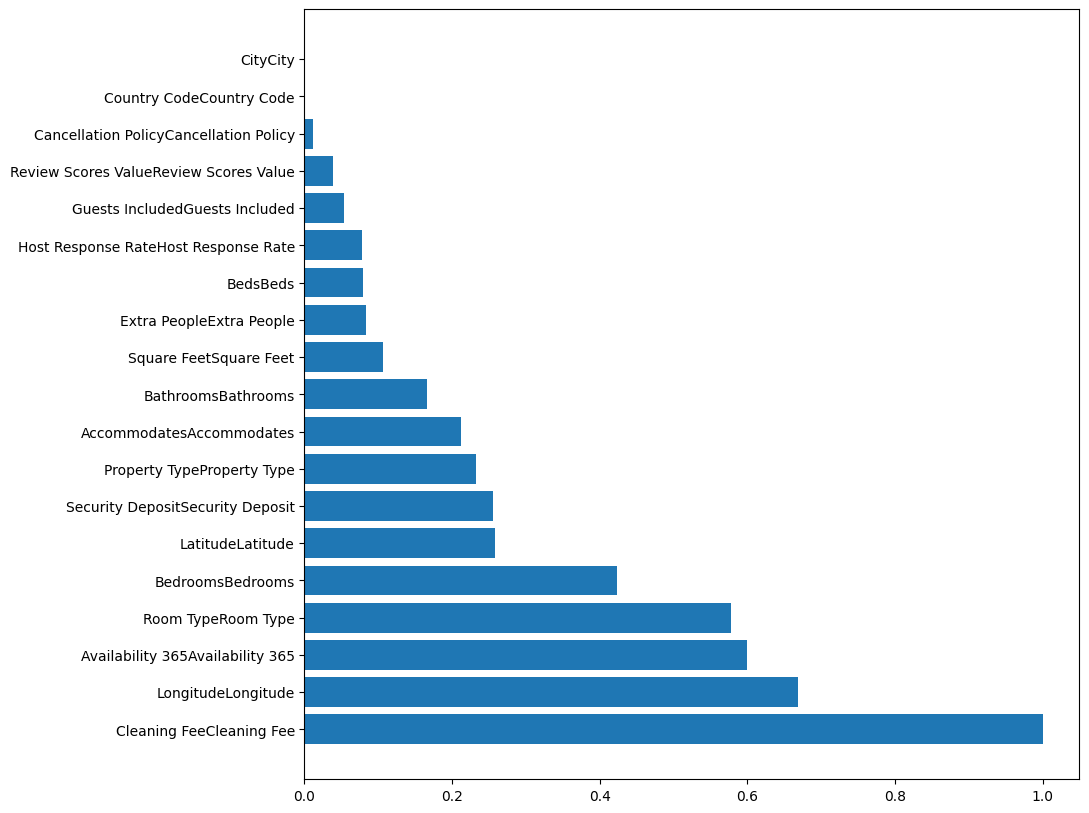

In [52]:
# Importancia de variables
s1= train_df.columns.drop(['Price'])
s2 = test_df.columns.drop(['Price'])
features = s1 + s2
bt = GradientBoostingClassifier(random_state=0, max_depth=2,learning_rate=lrOptimo, n_estimators=neOptimo)
bt.fit(X_train,y_train)
importances = bt.feature_importances_
importances = importances / np.max(importances)
importances

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),features[indices])
plt.show()

*Como podemos observar, este algoritmo ha mejora mucho el error de nuestro modelo( comparativamente claro), este mismo se basa en árboles potenciados (Boosting), es decir, combina muchos árboles débiles para formar un predictor fuerte y cada árbol corrige los errores del anterior.*


   ***¡Una mejoría alcanzada!***

*Tambien podemos observar la importancia de las variables y bueno, el gran costo computacional de otro algoritmo (35minutos en mi ordenador) el cual podriamos seguir ajustando para obtener mejores resultados; para seguir  mejorando nuestro modelo, podriamos eliminar mas variables y/o buscar nuevamente outliers, etc*                                            

*Para la finalidad de este proyecto: manejo adecuado de tecnicas de ML, exploracion de tecnicas estadisticas, creacion de diversos modelos, aplicacion de diversos algoritmos y adecuada documentacion, dejaremos la exploracion hasta este punto.*

###      **¡Gracias por haber visitado mi proyecto!**